In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# image = cv2.imread('IMAGES/car.jpg')

## 1. Read images, show images and save images

### cv2.imread()
* cv2.IMREAD_COLOR
* cv2.IMREAD_GRAYSCALE
* cv2.IMREAD_UNCHANGED

### cv2.imshow()

### cv2.imwrite()

width: 468 pixels
height: 247 pixels
channels: 3


True

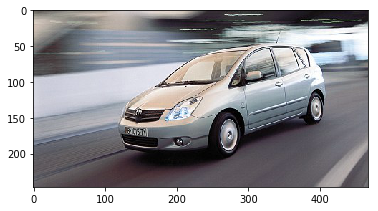

In [8]:
image = cv2.imread('IMAGES/car.jpg')

print(f"width: {image.shape[1]} pixels")
print(f"height: {image.shape[0]} pixels")
print(f"channels: {image.shape[2]}")

cv2.imshow("Image", image)
plt.imshow(image)
cv2.waitKey(0)

cv2.imwrite("OUTPUTS/new_image1.jpg", image)

## 2. Pixel points and local image

In [2]:
patch1 = image[0:100, 0:100]
cv2.imshow("patch1", patch1)

## 3. Basic line operation

-1

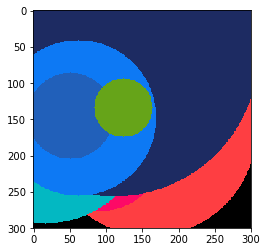

In [9]:
import numpy as np

canvas = np.zeros((300,300,3), dtype='uint8')

for _ in range(0,25):
    radius = np.random.randint(5, 200)
    color = np.random.randint(0, 256, size=(3,)).tolist()
    pt = np.random.randint(0, 200, size=(2,))
    
    cv2.circle(canvas, tuple(pt), radius, color, -1)
    
cv2.imshow('Canvas', canvas)
plt.imshow(canvas)
cv2.waitKey(0)

## 4. Shift

-1

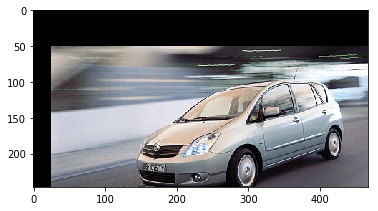

In [14]:
# 右移25个像素，下移50个像素
M = np.float32([[1,0,25], [0,1,50]])
# warpAffine 仿射变换
shifted_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(shifted_image)
cv2.imshow('shifted_image', shifted_image)
cv2.waitKey(0)

## 5. Rotate

-1

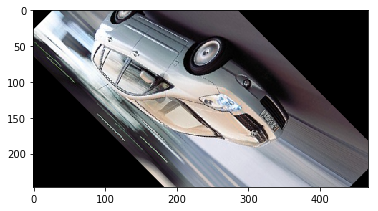

In [15]:
(h, w) = image.shape[:2]
center = (w//2, h//2)

# 旋转中心点，旋转角度，图片缩放尺度
M = cv2.getRotationMatrix2D(center, 135, 1.0)
Rotated_image = cv2.warpAffine(image, M, (w,h))
plt.imshow(Rotated_image)
cv2.imshow('Rotated_image', Rotated_image)
cv2.waitKey(0)

## 6. Resize
### interpolation
* cv2.INTER_NEAREST
* cv2.INTER_LINEAR   (建议放大使用)
* cv2.INTER_CUBIC
* cv2.INTER_AREA   (建议缩小使用)
* cv2.INTER_LANCZOS4
* cv2.INTER_LINEAR_EXACT
* cv2.INTER_MAX
* cv2.WARP_FILL_OUTLIERS
* cv2.WARP_INVERSE_MAP

-1

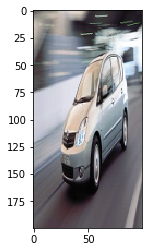

In [4]:
new_w, new_h = 100, 200
resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
plt.imshow(resized_image)
cv2.imshow('resized_image', resized_image)
cv2.waitKey(0)

## 7. Flip

-1

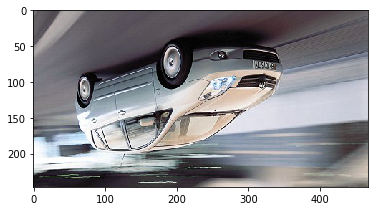

In [5]:
fliped_image = cv2.flip(image, -1)
plt.imshow(fliped_image)
cv2.imshow('fliped_image', fliped_image)
cv2.waitKey(0)

## 8. Crop

In [ ]:
cropped_image = image[50:150, 50:150]
plt.imshow(cropped_image)
cv2.imshow('cropped_image', cropped_image)
cv2.waitKey(0)

## 9. Algorithm operation

OpenCV直接进行截断操作， numpy是取模运算

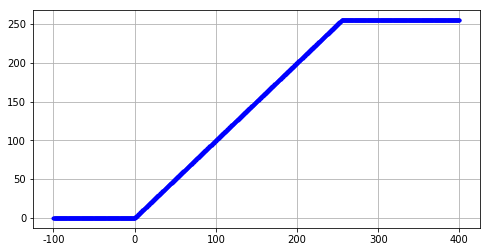

In [26]:
def F(x):
    if x<0:
        return 0
    elif x>255:
        return 255
    else:
        return x
    
x = np.linspace(-100,400,1000)
plt.figure(figsize=(8,4))
for px in x:
    py = F(px)
    plt.plot(px, py, 'b.')

plt.grid()

In [9]:
x, y = np.uint8([100]), np.uint8([200])
print(cv2.add(x, y))
print(cv2.subtract(x, y))
print(x + y)
print(x - y)

[[255]]
[[0]]
[44]
[156]


## 10. Bitwise operation

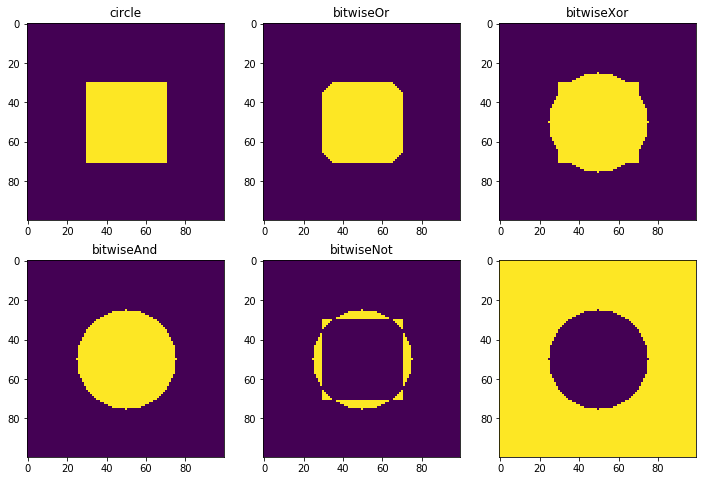

In [41]:
plt.figure(figsize=(12,8))

rectangle = np.zeros((100,100), dtype='uint8')
cv2.rectangle(rectangle, (30,30), (70,70), 255, -1)
plt.title('rectangle')
plt.subplot(231)
plt.imshow(rectangle)

circle = np.zeros((100,100), dtype='uint8')
cv2.circle(circle, (50,50), 25, 255, -1)
plt.title('circle')
plt.subplot(234)
plt.imshow(circle)

bitwiseAnd = cv2.bitwise_and(rectangle, circle)
plt.title('bitwiseAnd')
plt.subplot(232)
plt.imshow(bitwiseAnd)

bitwiseOr = cv2.bitwise_or(rectangle, circle)
plt.title('bitwiseOr')
plt.subplot(233)
plt.imshow(bitwiseOr)

bitwiseXor = cv2.bitwise_xor(rectangle, circle)
plt.title('bitwiseXor')
plt.subplot(235)
plt.imshow(bitwiseXor)

bitwiseNot = cv2.bitwise_not(circle)
plt.title('bitwiseNot')
plt.subplot(236)
plt.imshow(bitwiseNot)


## 11. Masking operation
使用mask(起遮罩效果)可以让我们只关注图像的某一区域，可以称作<u>**感兴趣区域(RoI, Region of Interest)**</u>

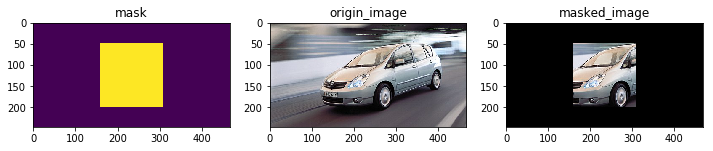

In [43]:
mask = np.zeros(image.shape[:2], dtype='uint8')

(cX, cY) = (image.shape[1]//2, image.shape[0]//2)
cv2.rectangle(mask, (cX-75, cY-75), (cX+75,cY+75), 255, -1)
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.title('mask')
plt.imshow(mask)


masked = cv2.bitwise_and(image, image, mask=mask)
plt.subplot(132)
plt.title('origin_image')
plt.imshow(image)

plt.subplot(133)
plt.title('masked_image')
plt.imshow(masked)

## 12. Color channel split & merge

Text(0.5,1,'Merged')

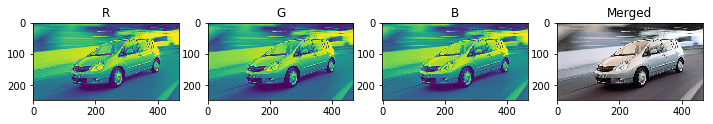

In [46]:
(B, G, R) = cv2.split(image)
merged = cv2.merge([B, G, R])

plt.figure(figsize=(12,4))
plt.subplot(141)
plt.imshow(R)
plt.title('R')

plt.subplot(142)
plt.imshow(G)
plt.title('G')

plt.subplot(143)
plt.imshow(B)
plt.title('B')

plt.subplot(144)
plt.imshow(merged)
plt.title('Merged')

## 13. Color spatial transform

Text(0.5,1,'LAB')

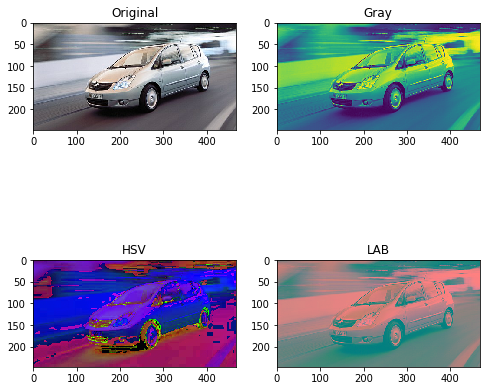

In [48]:
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.imshow(image)
plt.title('Original')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(222)
plt.imshow(gray)
plt.title('Gray')

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.subplot(223)
plt.imshow(hsv)
plt.title('HSV')

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
plt.subplot(224)
plt.imshow(lab)
plt.title('LAB')

## 14. Color histogram
### cv2.calcHist(images, channels, mask, histSize, ranges)
* images: 图像列表
* channels: 通道索引
* mask: 掩模(如果提供只计算mask大于0的区域，不使用则传None)
* histSize: 统计通道设置区间数
* ranges: 像素点值域

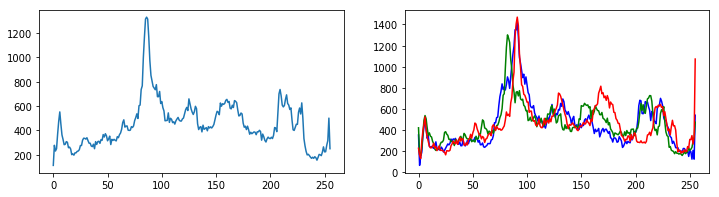

In [52]:
gray_image =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray_image], [0], None, [256], [0,256])

plt.figure(figsize=(12,3))
p1 = plt.subplot(121)
p2 = plt.subplot(122)

# Grayscale histogram
p1.plot(hist)

chans = cv2.split(image)
colors = ('b', 'g', 'r')
# Color histogram
for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0,256])
    p2.plot(hist, color=color)

## 15. Image  smooth & blur
* **blur 均值滤波器**: 卷积核(感受野)越大，平滑效果越好
* **GaussianBlur 高斯滤波器**: 比简单的均值更加自然
* **medianBlur 中值滤波器**: 中值对去椒盐噪声十分有效
* **bilateralFilter 双边滤波器**: 通过引入两个高斯分布，在去除噪声的同时保留了边缘信息，但处理速度较慢

Text(0.5,1,'Bilateral')

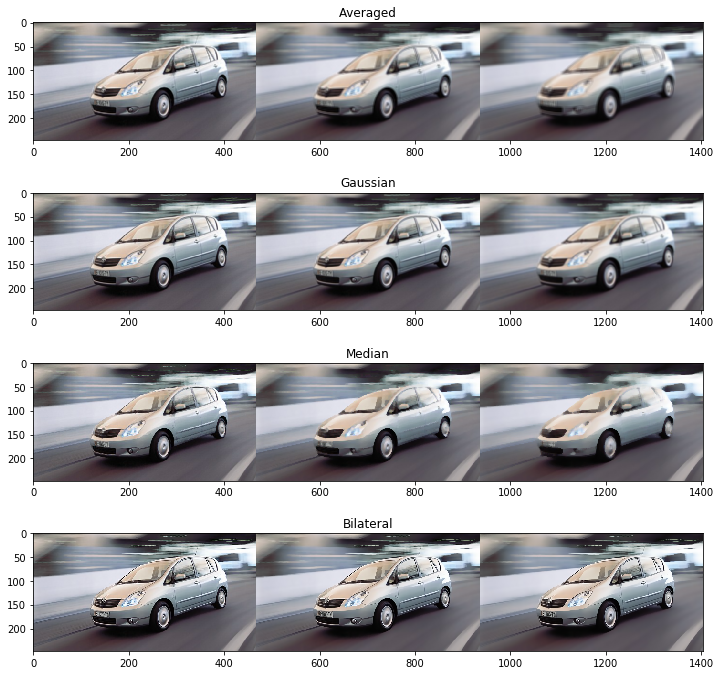

In [56]:
plt.figure(figsize=(12,12))

# 均值滤波器
blurred_average = np.hstack([
    cv2.blur(image, (3,3)),
    cv2.blur(image, (5,5)),
    cv2.blur(image, (7,7))
])

# 高斯滤波器
blurred_gaussian = np.hstack([
    cv2.GaussianBlur(image, (3,3), 0),
    cv2.GaussianBlur(image, (5,5), 0),
    cv2.GaussianBlur(image, (7,7), 0)
])

# 中值滤波器
blurred_median = np.hstack([
    cv2.medianBlur(image, 3),
    cv2.medianBlur(image, 5),
    cv2.medianBlur(image, 7)
])

# 双侧滤波器
blurred_bilateral = np.hstack([
    cv2.bilateralFilter(image, 5, 21, 21),
    cv2.bilateralFilter(image, 7, 31, 31),
    cv2.bilateralFilter(image, 9, 41, 41)
])


plt.subplot(411)
plt.imshow(blurred_average)
plt.title('Averaged')

plt.subplot(412)
plt.imshow(blurred_gaussian)
plt.title('Gaussian')

plt.subplot(413)
plt.imshow(blurred_median)
plt.title('Median')

plt.subplot(414)
plt.imshow(blurred_bilateral)
plt.title('Bilateral')


## 16. Edge detection
主要方法有: Sobel、Canny、Laplacian、Scharr，主要过程包括：平滑降噪、求梯度，非极大值抑制与滞后抑制
<br>
### Sobel
** Sobel(src, ddepth, dx, dy, dst=None, ksize=None, scale=None, delta=None, borderType=None) **
* src: 原图像
* ddepth: 图像深度(-1表示保持原图像深度)
* dx: x方向上的差分阶数(0/1)
* dy: y方向上的差分阶数(0/1)
* dst: 目标图像
* ksize: 卷积模版大小(1/3/5/7)
* scale: 缩放导数的比例常数(默认为没有比例常数)
* delta: 可选增量，加到输出图像的值
* borderType: 判断图像边界模式(默认为cv2.BORDER_DEFAULT)

### Scharr
** Scharr(src, ddepth, dx, dy, dst=None, ksize=None, scale=None, delta=None, borderType=None) ** <br>
* Scharr与Sobel的区别在于Scharr仅使用大小为3的卷积模版，结果更为精确

### Canny
** Canny(image, threshold1, threshold2, edges=None, apertureSize=None, L2gradient=None) ** <br>
* threshold1: 低阈值
* threshold2: 高阈值
* edges: 单通道存储边缘的输出图像
* apertureSize: Sobel算子内核的大小
* L2gradient: Bool类型，为为真表示使用更精确的L2范数进行计算(两个方向的倒数的平方再开放），为假表示用L1范数(直接将两个方向导数的绝对值相加）

### Laplacian
** Laplacian(src, ddepth, dst=None, ksize=None, scale=None, delta=None, borderType=None) ** <br>
* scale: Laplace可选比例因子，默认为1.0

Text(0.5,1,'Sobel_xy')

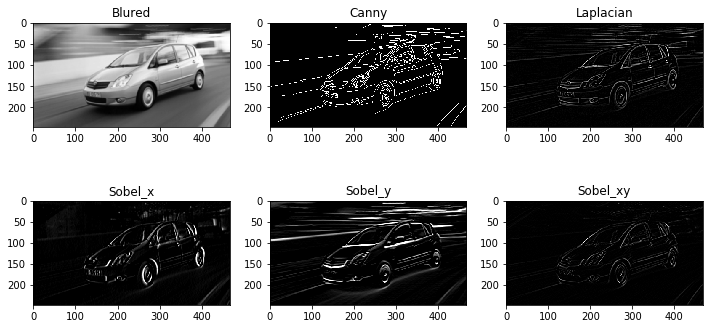

In [79]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blured = cv2.GaussianBlur(gray, (5,5), 0)
canny = cv2.Canny(blured, 30, 150)
laplacian = cv2.Laplacian(blured, ddepth=-1, ksize=3)
sobel_x = cv2.Sobel(blured, ddepth=-1, dx=1, dy=0)
sobel_y = cv2.Sobel(blured, ddepth=-1, dx=0, dy=1)
sobel_xy = cv2.Sobel(blured, ddepth=-1, dx=1, dy=1)


plt.figure(figsize=(12,6))

plt.subplot(231)
plt.imshow(blured, cmap='gray')
plt.title('Blured')

plt.subplot(232)
plt.imshow(canny, cmap='gray')
plt.title('Canny')

plt.subplot(233)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')

plt.subplot(234)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel_x')

plt.subplot(235)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel_y')

plt.subplot(236)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel_xy')



## 17. Face & eyes detection

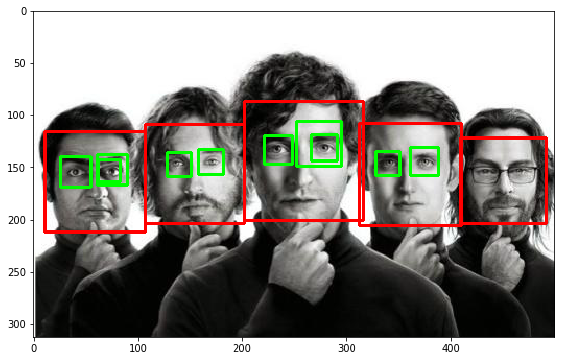

In [90]:
img = cv2.imread('IMAGES/face_test.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier('./MODEL/haarcascade_frontalface_default.xml')
faces_rects = faceCascade.detectMultiScale(img, scaleFactor=1.05, minNeighbors=5, minSize=(30,30), flags=cv2.CASCADE_SCALE_IMAGE)
eye_cascade = cv2.CascadeClassifier('./MODEL/haarcascade_eye.xml')

for (x,y,w,h) in faces_rects:
    img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)
plt.figure(figsize=(12,6))
plt.imshow(img)